In [ ]:
#search space
from hyperopt import hp

range_10 = ["auto"] +list(range(1, 10))
range_20 = list(range(1, 20))
range_20_none = [None] +list(range(1, 20))
range_300_2000 = list(range(299, 2000))
range_2_1000 = [None] + list(range(2, 1000))
range2_20 = list(range(2, 20))
range_01 = ['auto', 'sqrt', 'log2'] + [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

param_space = {
    'pca__iterated_power': hp.choice('pca__iterated_power', range_10),
    'pca__n_components': hp.choice('pca__n_components',range_20_none),
    'pca__svd_solver':hp.choice('pca__svd_solver',['auto','full','randomized']),
    'pca__tol': hp.uniform('pca__tol',0,0.5),
    'pca__whiten': hp.choice('pca__whiten', [True, False]),

    'randomforestclassifier__criterion': hp.choice('randomforestclassifier__criterion', ["gini", "entropy"]),
    'randomforestclassifier__max_depth': hp.choice('randomforestclassifier__max_depth',range_2_1000),
    'randomforestclassifier__min_samples_leaf': hp.choice('randomforestclassifier__min_samples_leaf',range_20),
    'randomforestclassifier__min_samples_split': hp.choice('randomforestclassifier__min_samples_split',range2_20),
    'randomforestclassifier__min_weight_fraction_leaf':hp.uniform('randomforestclassifier__min_weight_fraction_leaf',0.0, 0.5),
    'randomforestclassifier__max_features':hp.choice('randomforestclassifier__max_features',range_01),
    'randomforestclassifier__n_estimators': hp.choice('randomforestclassifier__n_estimators', range_300_2000),
    'randomforestclassifier__oob_score': hp.choice('randomforestclassifier__oob_score', [True, False]),
}

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

# Functions


In [2]:
def single_loss_plot_builder(trial,plot_label,xlabel,ylabel):
    losses = trial.losses()
    losses= [abs(i) for i in losses]
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 8
    plt.plot(losses, label='{}'.format(plot_label))
    plt.grid(True)
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.legend(loc=3)
    plt.show()

In [11]:
def trial_utils(trial):
    losses = trial.losses()
    losses = [abs(i) for i in losses]
    losses = np.array(losses)
    best_indices = np.argwhere(losses == np.amax(losses))
    best_indices = best_indices.flatten().tolist()
    avg_score = losses.mean()
    

    best_score_id = trial.best_trial['tid']
    best_score = abs(trial.best_trial['result']['loss'])
    
    

    print('Best score:{} \n best score id:{} \n Average score:{}'.format(best_score,best_score_id,avg_score))
    print("all best scores idices {}".format(best_indices))
    print("-----------")
    all_best = {}
    for t in trial.trials:
        if abs(t['result']['loss']) == best_score:
            all_best[t['tid']]= t['misc']['vals']
#     return all_best    
    

In [60]:
def find_min(losses):
    chart_list =[]
    small = losses[0]
    chart_list.append(small)
    
    for i in losses:
        if (i<small):
            chart_list.append(i)
            small = i
        else:
            chart_list.append(small)
    return chart_list





def step_step_chart(trial,start,end,plot_label,xlabel,ylabel,trial2,start2,end2,plot_label2):
    
    losses = trial.losses()
    losses = [1+i for i in losses]
    
    
    losses2 = trial2.losses()
    losses2 = [1+i for i in losses2]
    
    chart_list = find_min(losses)
    chart_list2 = find_min(losses2)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 8
    plt.plot(chart_list[start:end], label='{}'.format(plot_label))
    plt.plot(chart_list2[start2:end2], label='{}'.format(plot_label2))
    plt.grid(True)
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.legend(loc=3)
    plt.show()

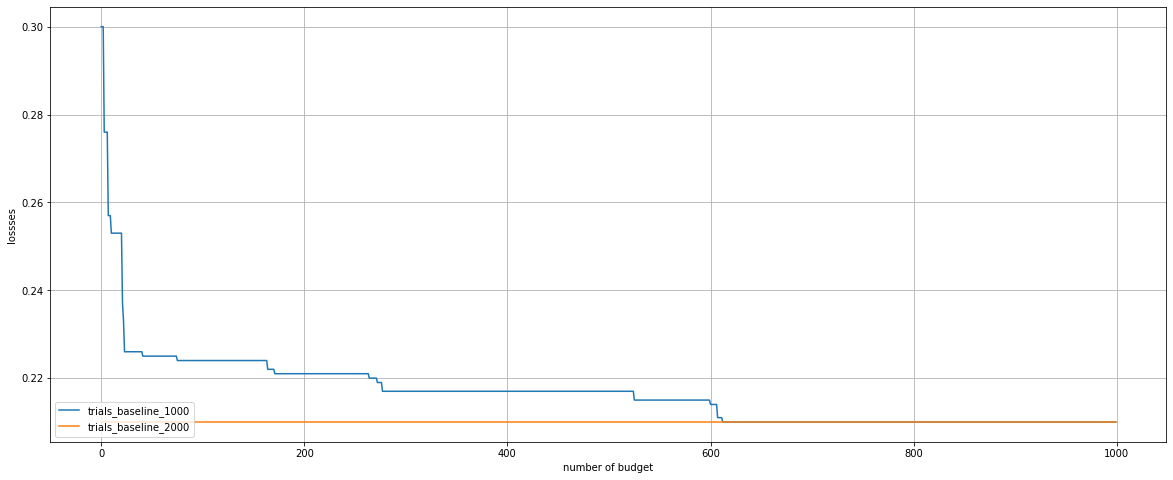

In [61]:
step_step_chart(trials_baseline_1000,0,1000,'trials_baseline_1000','number of budget','lossses',
               trials_baseline_2000,1000,2000,'trials_baseline_2000')


In [41]:
trials_baseline_1000  = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results_onserver/ashkan_server/baseline_1000_iteration.p","rb"))
trials_baseline_2000  = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results_onserver/Dima_server/baseline_2000_iteration_fixedstate.p","rb"))
trials_baseline_6000  = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results_onserver/ashkan_server/baseline_5000_iteration_with1000_initialpoint.p","rb"))

In [42]:
len(trials_baseline_2000)

2000

In [43]:
trials_baseline_1000_1  = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results/baseline_1000run.p","rb"))
trials_baseline_1000_2  = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/results/baseline_1000run_2.p","rb"))

In [44]:
trial_utils(trials_baseline_1000_1)
trial_utils(trials_baseline_1000_2)

Best score:0.7179999999999999 
 best score id:948 
 Average score:0.7012859999999999
all best scores idices [948]
-----------
Best score:0.7150000000000001 
 best score id:107 
 Average score:0.7011629999999998
all best scores idices [107, 401, 567, 579]
-----------


In [45]:
np.array([abs(i) for i in trials_baseline_1000_2.losses()[0:1000]]).mean()

0.7011629999999998

In [46]:
np.array([abs(i) for i in trials_baseline_2000.losses()[1000:2000]]).mean()

0.744279

In [47]:
np.array([abs(i) for i in trials_baseline_6000.losses()[1000:6000]]).mean()

0.7508068000000001

In [16]:
trial_utils(trials_baseline_1000)
trial_utils(trials_baseline_2000)
trial_utils(trials_baseline_5000)

Best score:0.79 
 best score id:611 
 Average score:0.729153
all best scores idices [611]
-----------
Best score:0.79 
 best score id:611 
 Average score:0.736716
all best scores idices [611, 1618]
-----------
Best score:0.793 
 best score id:4891 
 Average score:0.7471978333333333
all best scores idices [4891, 5842, 5851]
-----------


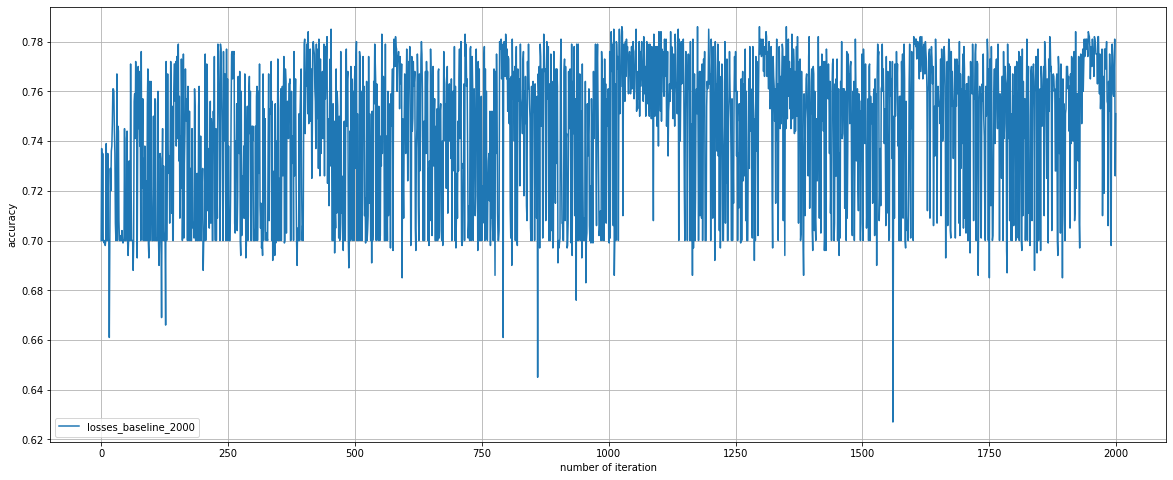

In [9]:
single_loss_plot_builder(trials_baseline_2000,'losses_baseline_2000','number of iteration','accuracy')

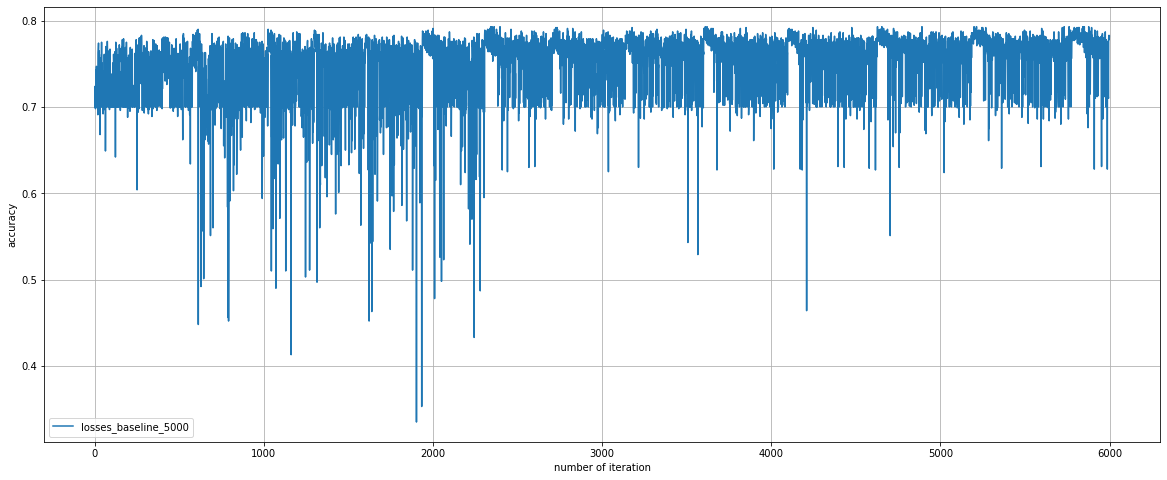

In [29]:
single_loss_plot_builder(trials_baseline_5000,'losses_baseline_5000','number of iteration','accuracy')

In [38]:
trials_baseline_1000.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': -0.7000000000000001, 'status': 'ok'},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'pca__iterated_power': [0],
    'pca__n_components': [0],
    'pca__svd_solver': [0],
    'pca__tol': [0],
    'pca__whiten': [0],
    'randomforestclassifier__criterion': [0],
    'randomforestclassifier__max_depth': [0],
    'randomforestclassifier__max_features': [0],
    'randomforestclassifier__min_samples_leaf': [0],
    'randomforestclassifier__min_samples_split': [0],
    'randomforestclassifier__min_weight_fraction_leaf': [0],
    'randomforestclassifier__n_estimators': [0],
    'randomforestclassifier__oob_score': [0]},
   'vals': {'pca__iterated_power': [7],
    'pca__n_components': [17],
    'pca__svd_solver': [0],
    'pca__tol': [0.07595709217124541],
    'pca__whiten': [1],
    'randomforestclassifier__criterion': [0],
    'randomforestclassifier__max_depth': [940],
  